# ADVANCED REGRESSION ASSIGNMENT ON  HOUSING PRICE PREDICTION

# Assignment Part-I

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

# Reading , understading and visulaization of data

In [496]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [497]:
# Setting the rows , columns and width to display all the values
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.width', 1000)

In [498]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [499]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [500]:
# get overall statstical info
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [501]:
# Removing 'Id' , as it is not dive any insights.
data = data.drop(['Id' ], axis =1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Replacing the values as below:

Alley:        NA as No alley access         
BsmtQual:     NA as No Basement     
BsmtCond:     NA as	No Basement     
BsmtExposure: NA as	No Basement     
BsmtFinType1: NA as	No Basement     
BsmtFinType2: NA as	No Basement      
FireplaceQu:  NA as	No Fireplace      
GarageType:   NA as	No Garage      
GarageFinish: NA as	No Garage     
GarageQual:   NA as	No Garage     
GarageCond:   NA as	No Garage     
PoolQC:       NA as	No Pool    
Fence:        NA as	No Fence     

In [502]:
col_names = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish','GarageQual','GarageCond', 'PoolQC', 'Fence']
values = ['No alley access', 'No Basement', 'No Basement', 'No Basement', 'No Basement', 'No Basement', 'No Fireplace', 'No Garage', 'No Garage','No Garage','No Garage', 'No Pool', 'No Fence']
l = len(col_names)
for i in range(0, l-1):
    data[col_names[i]] = data[col_names[i]].replace(np.nan,values[i]) 
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,NaN,NaN,0,12,2008,WD,Normal,250000


In [503]:
# Checking the null values
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [504]:
# Checking the missing percentage of all the cloumns
print(round(data.isnull().sum()*100/len(data.index),2).sort_values(ascending=False))

MiscFeature      96.30
Fence            80.75
LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
FullBath          0.00
LowQualFinSF      0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu       0.00
GarageType        0.00
2ndFlrSF          0.00
HalfBath          0.00
MSSubClass        0.00
GarageFinish      0.00
ScreenPorch       0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
PoolQC            0.00
PoolArea          0.00
3SsnPorch         0.00
1stFlrSF          0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageCond        0.00
GarageQual        0.00
GarageArea        0.00
GarageCars        0.00
CentralAir        0.00
MSZoning   

In [505]:
# As 'MiscFeature' and 'Fence' has more that 50% missing values, dropping them form the data
data = data.drop(['MiscFeature','Fence'], axis =1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,0,12,2008,WD,Normal,250000


In [506]:
data.shape

(1460, 78)

LotFrontage has 17.74, GarageYrBlt has 5.55, MasVnrType has 0.55, MasVnrArea  has 0.55 and Electrical has 0.07 percentage missing values.
From the info() , we got as ,
LotFrontage - float64    
GarageYrBlt - float64   
MasVnrType - object   
MasVnrArea - float64   
Electrical - object   

'MasVnrType' has the values as 'None' which means it does not have. So replacing this with 'No Masonry veneer type'
Replace the LotFrontage,  GarageYrBlt and MasVnrArea with median. 
Replace the Electrical with mode.

In [507]:
data['MasVnrType'] = data['MasVnrType'].replace('None','No Masonry veneer type')

In [508]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['GarageYrBlt'].median())
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])

In [509]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry veneer type,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry veneer type,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,0,12,2008,WD,Normal,250000


In [510]:
# Checking total number of null balues again
data.isna().sum().sum()

0

YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)
Since some of the house are remodeled and some are not, we can use 'YearRemodAdd' to identify how old the house is.
So dropping the 'YearBuilt' from the data set.

In [511]:
data = data.drop(['YearBuilt'], axis =1)
data.shape

(1460, 77)

# Handling the outliers

In [512]:
# get numeric and categorical variable names for univariate analysis
num_cols = [col for col in data.columns if data[col].dtype != 'object']
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
print(num_cols)
print(len(num_cols))
print(cat_cols)
print(len(cat_cols))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
36
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Garage

There are 36 columns of numeric variables.                  
41 columns of categoriacal variables.

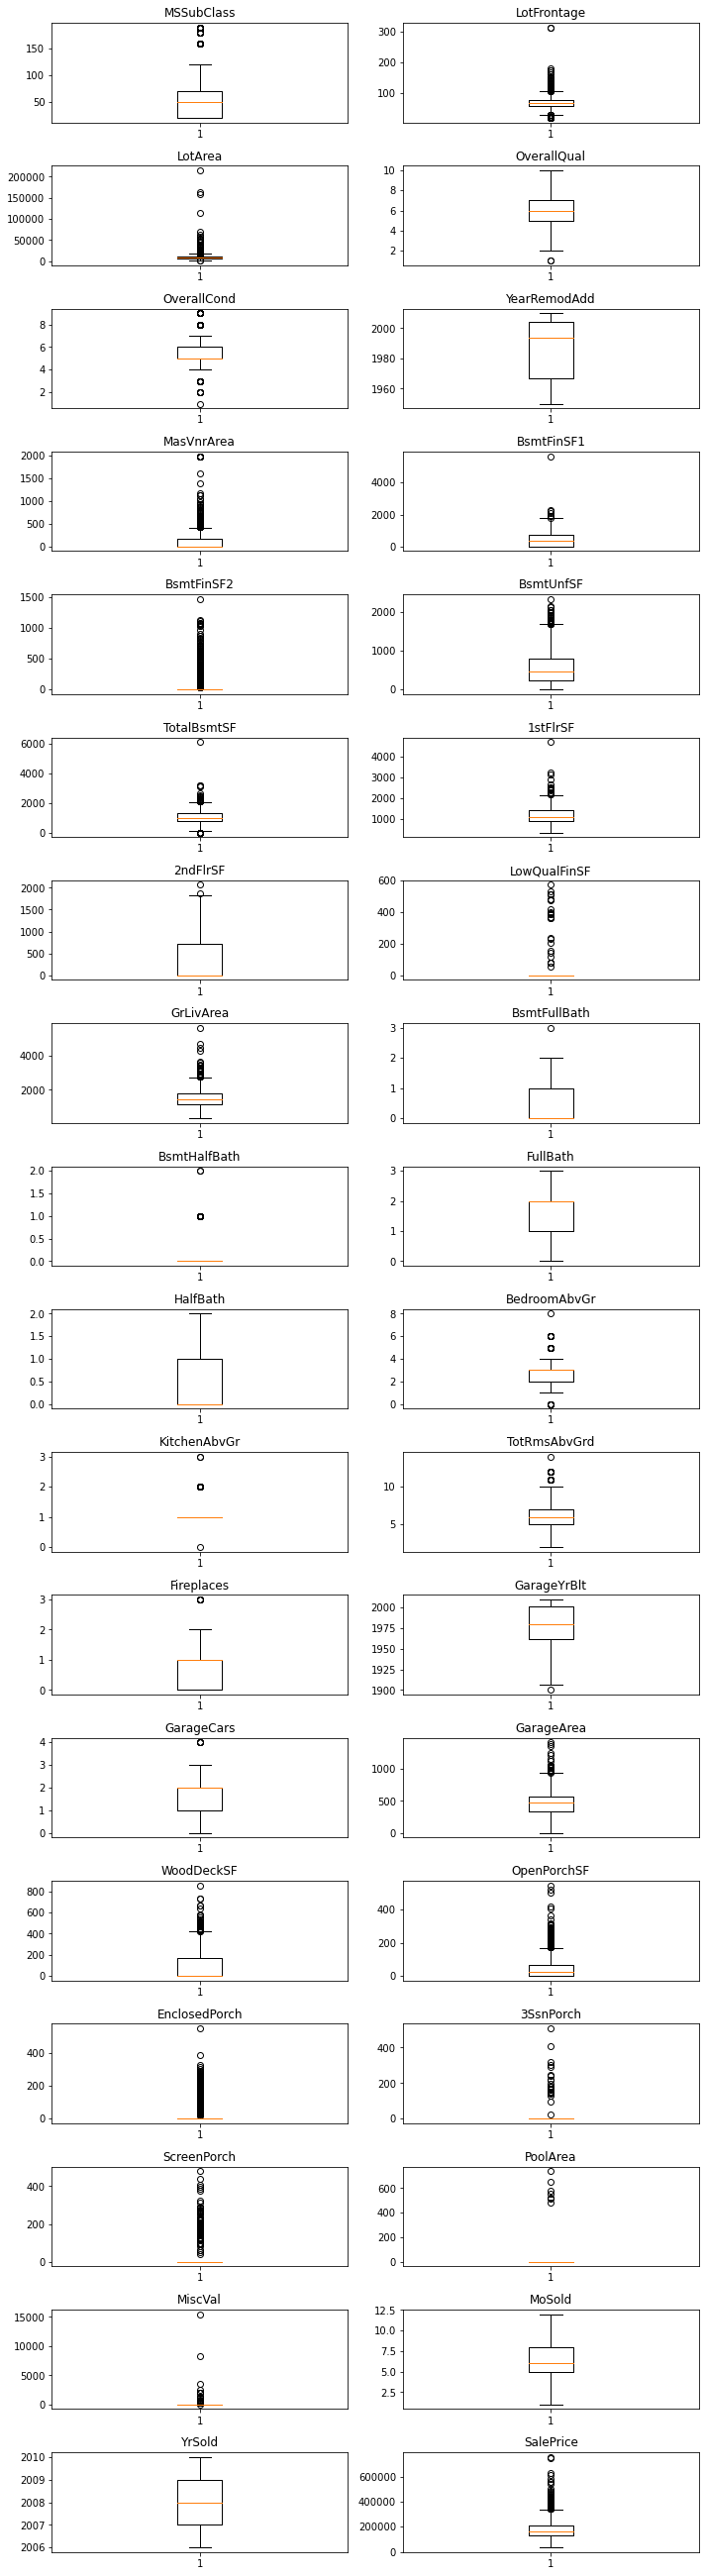

In [513]:
# plot all the numric variables with box plot and see for outliers
plt.figure(figsize=(10,40))
val = 1
for col in num_cols:
    plt.subplot(20,2,val)
    plt.title(col)
    plt.boxplot(data[col])
    val = val + 1
plt.tight_layout()
plt.show()
    

From the above graphs , we can see that many have outliers, like LotFrontage, LotArea, MasVnrArea, BasmtFinSF1,BasmtFinSF2, TotalBsmtSf, 1stFlrSF and so on.


BsmtHalfBath , KitchenAbvGr , 3SsnPorch, PoolArea, MiscVal have the large differences in the values. So dropping these values.

In [514]:
data = data.drop(['BsmtHalfBath','KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal'], axis =1)
data.shape

(1460, 72)

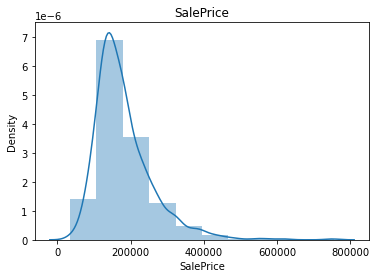

In [515]:
# Handling the target variable 'SalePrice'
plt.title('SalePrice')
sns.distplot(data['SalePrice'], bins=10)
plt.show()

Target variable 'SalePrice' is skewed towards right. So we need to transfer this by log method.

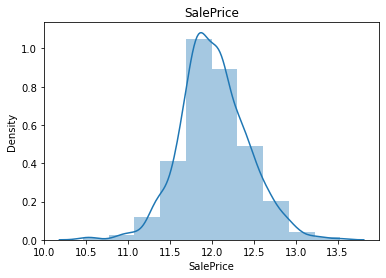

In [516]:
data['SalePrice'] = np.log(data['SalePrice'])
plt.title('SalePrice')
sns.distplot(data['SalePrice'], bins=10)
plt.show()

In [517]:
# Recalculating the numric data as we dropped few of them.
num_cols = [col for col in data.columns if data[col].dtype != 'object']
print(num_cols)
print(len(num_cols))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']
31


Now the target variable is normanlly distributed.

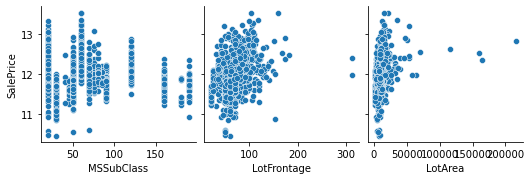

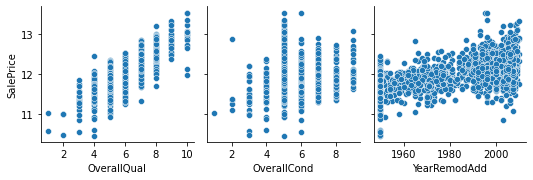

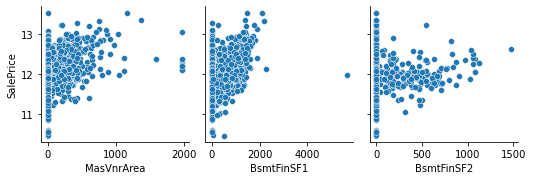

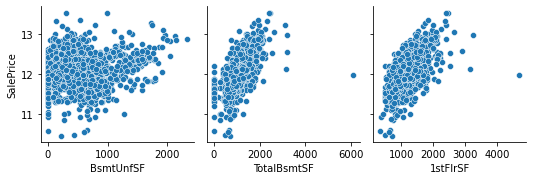

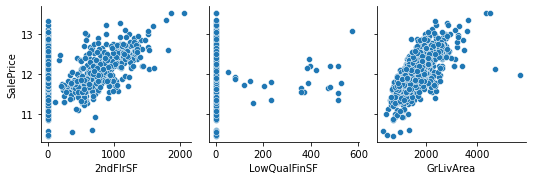

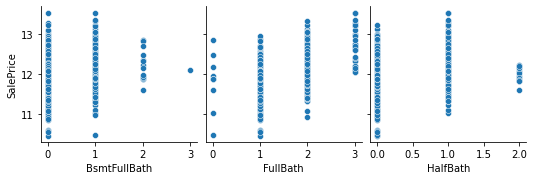

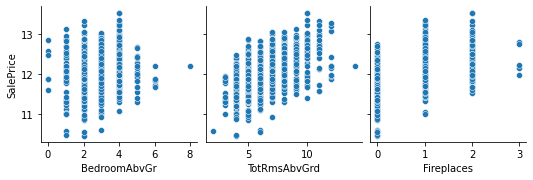

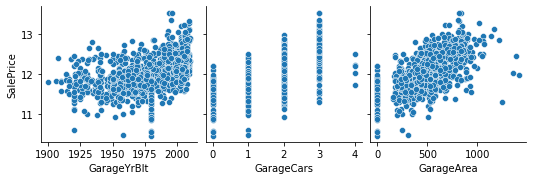

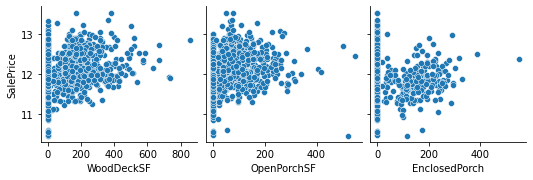

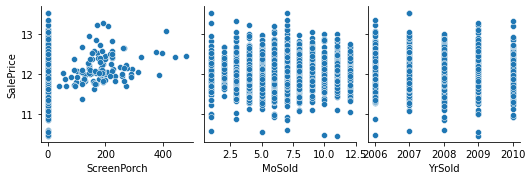

In [518]:
#sns.pairplot(data[[num_cols[i], num_cols[i+1], num_cols[i+2]]])
l = len(num_cols)
for i in range(0,l-2,3):
    sns.pairplot(data, x_vars=[num_cols[i], num_cols[i+1], num_cols[i+2]], y_vars='SalePrice')
plt.show()

Observations from the above graphs

SalesPrice - target variable
1. Some features have linear relationship with target variable
2. Some graphs are vertical lines which means kind of the categorical data pattern in numeric data.
3. Some features have outliers.

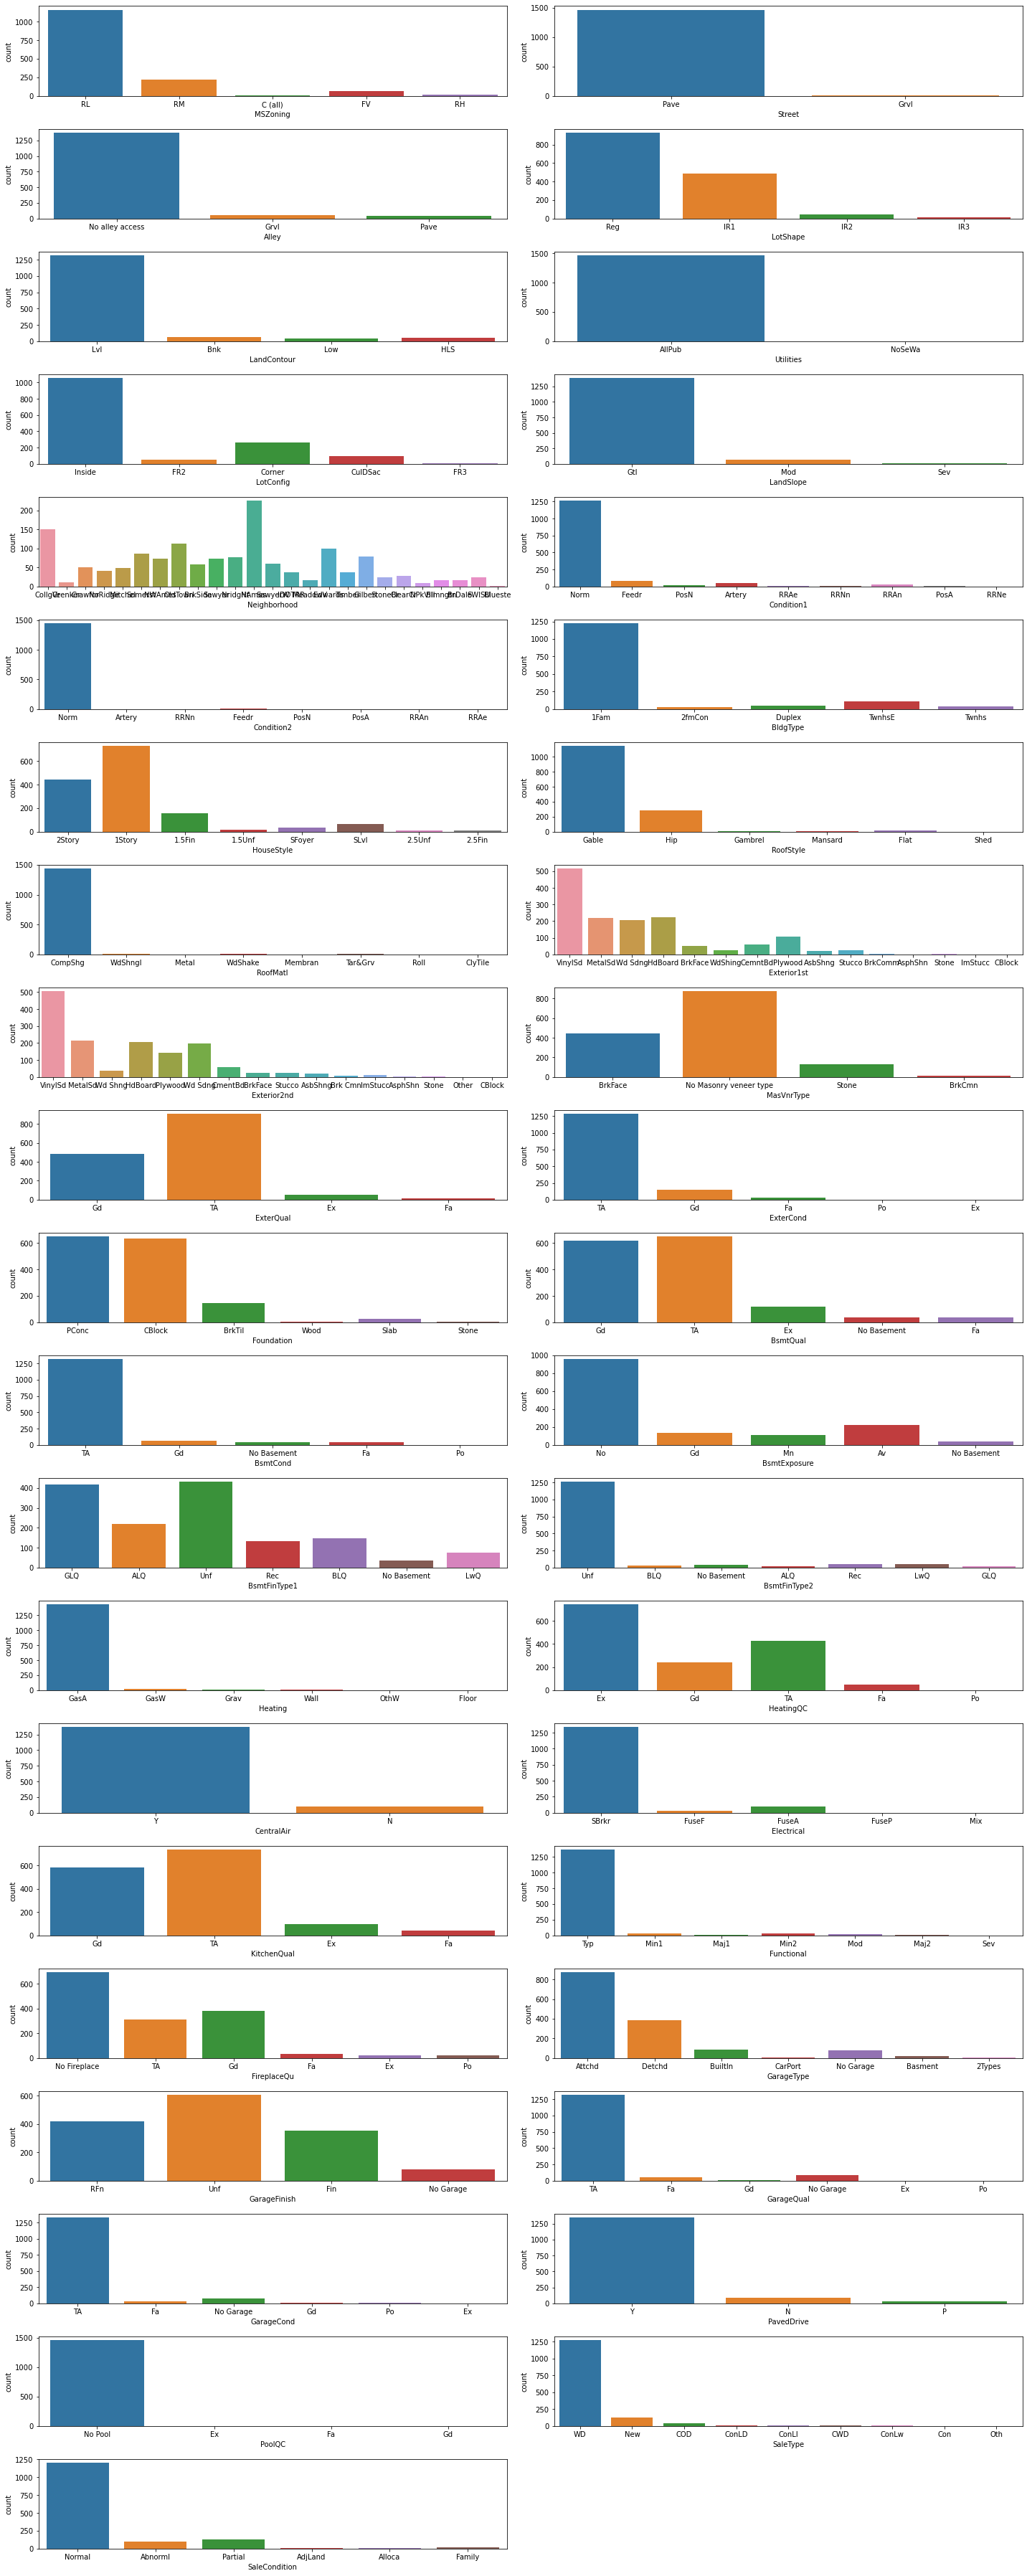

In [519]:
# plot all the categorical variables with histogram plots
plt.figure(figsize=(20,50))
val = 1
for col in cat_cols:
    plt.subplot(21,2,val)
    sns.countplot(col, data = data)
    val = val + 1
plt.tight_layout()
plt.show()
    

Street, Utilities, Condition2, RoofMatl, Heating, CentralAir, Functional, GarageQual, GarageCond and PoolQC are feature dominated mostly by single category values.

In [520]:
# Based on the above observation dropping columns from data.
data = data.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Functional', 'GarageQual', 'GarageCond' , 'PoolQC'], axis =1)
data.shape

(1460, 62)

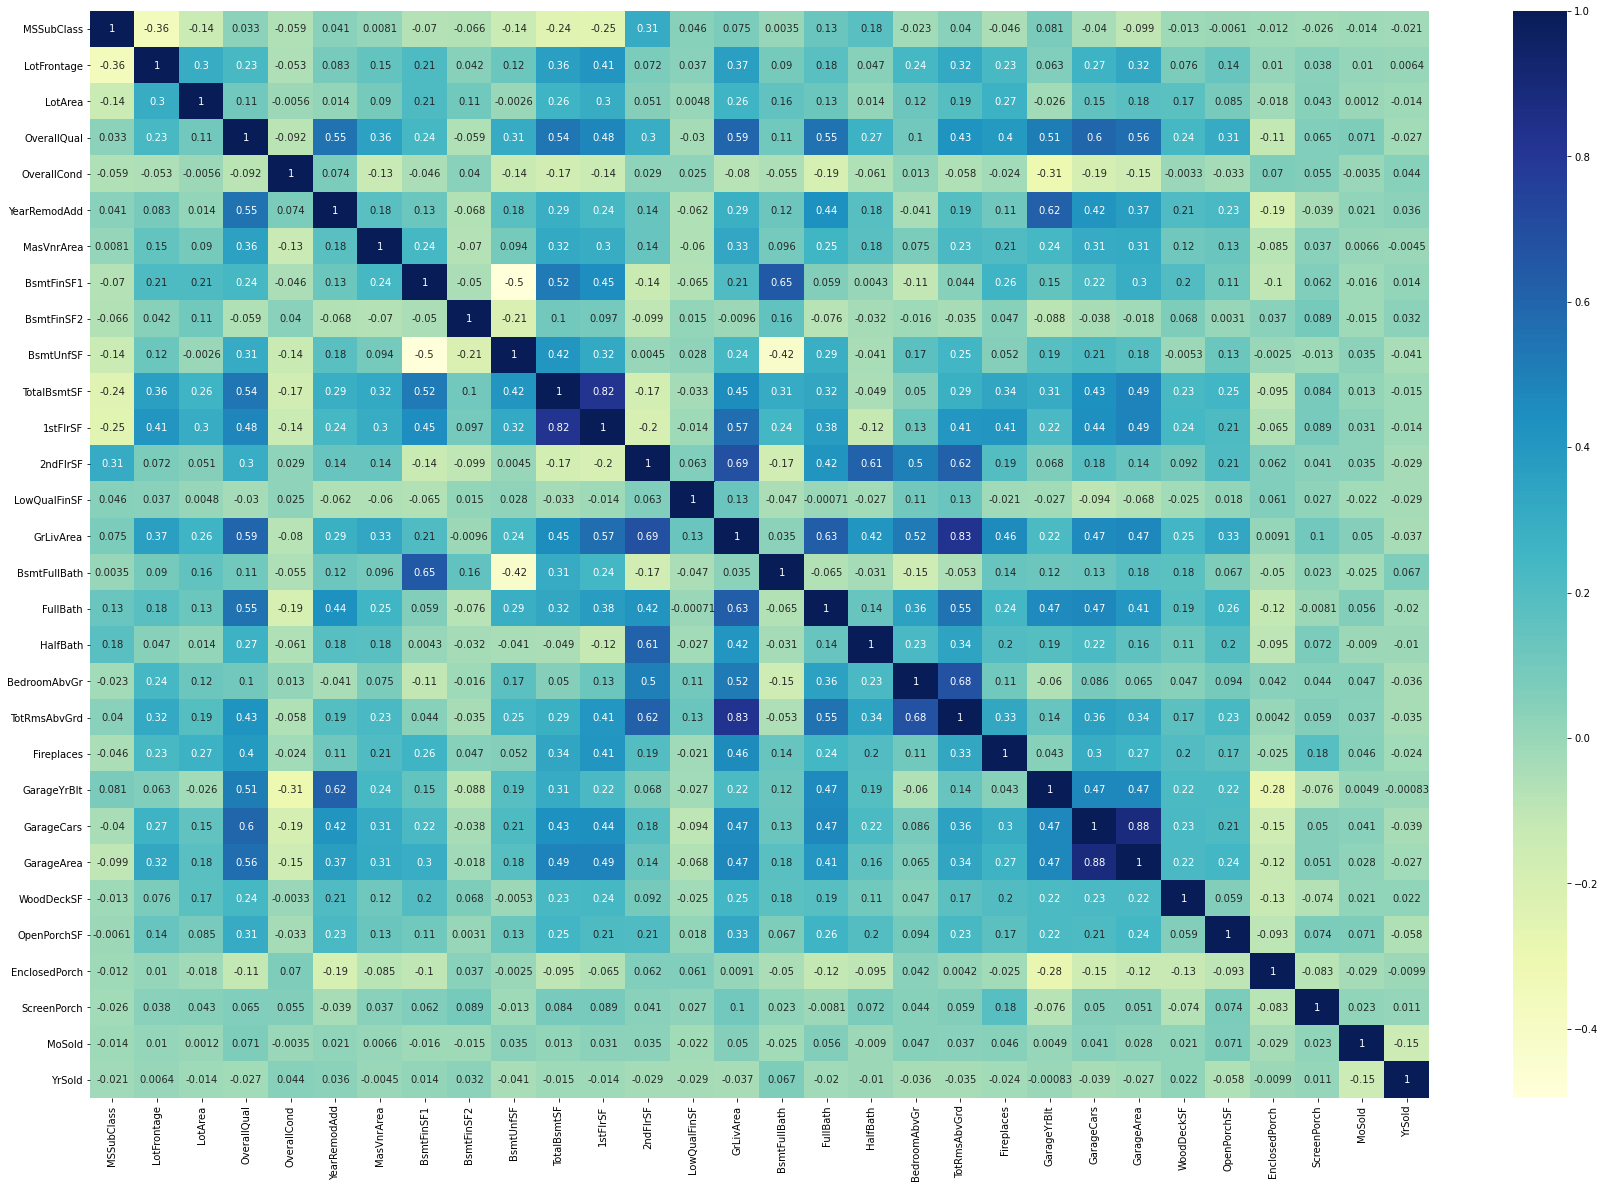

In [521]:
# Check the correlation of numerical columns (not considering the last value i.e., target value SalesPrice)

plt.figure(figsize = (30, 20))
sns.heatmap(data[num_cols[:-1]].corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above graph , 

1. TotalBsmtSF and  1stFlrSF have correlation of 82%
2. TotRmsAbvGrd and GrLivArea have correlation of 83%.
3. GarageArea and GarageCars show have correlation of 88%.
4. 2ndFlrSF and GrLivArea have correlation of 69%.

In [522]:
#Dropping the above mentioned cloumns from data.
data = data.drop(['TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'GrLivArea', 'GarageArea', 'GarageCars', '2ndFlrSF'], axis =1)
data.shape

(1460, 55)

In [523]:
# Recalculating the categorical data as we dropped few of them.
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
print(cat_cols)
print(len(cat_cols))

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
31


# Preparing the data for modelling 

### Creation of dummy values for categorical data

After the observation from the categorical data , we can see some of the features are ordered.
So we can give the numeric values to represent the orders.

1. ExterQual, ExterCond, HeatingQC, KitchenQual has values like, 
   
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
 
So we can map as , Ex - 5 , Gd - 4, TA -3 , Fa - 2 , Po - 1

In [524]:
col_names = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for col in col_names:
    data[col] = data[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,Electrical,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,Gd,TA,No,GLQ,706,Unf,0,150,5,SBrkr,0,1,2,1,3,4,0,No Fireplace,Attchd,2003.0,RFn,Y,0,61,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,No Masonry veneer type,0.0,3,3,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,5,SBrkr,0,0,2,0,3,3,1,TA,Attchd,1976.0,RFn,Y,298,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,5,SBrkr,0,1,2,1,3,4,1,TA,Attchd,2001.0,RFn,Y,0,42,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,No Masonry veneer type,0.0,3,3,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,4,SBrkr,0,1,1,0,3,4,1,Gd,Detchd,1998.0,Unf,Y,0,35,272,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,5,SBrkr,0,1,2,1,4,4,1,TA,Attchd,2000.0,RFn,Y,192,84,0,0,12,2008,WD,Normal,12.429216


2. BsmtQual, BsmtCond 

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
 
So we can map as , Ex - 5 , Gd - 4, TA -3 , Fa - 2 , Po - 1 , No Basement - 0

FireplaceQu
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

So we can map as , Ex - 5 , Gd - 4, TA -3 , Fa - 2 , Po - 1 , No Fireplace - 0

In [525]:
col_names = ['BsmtQual', 'BsmtCond']
for col in col_names:
    data[col] = data[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,Electrical,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,5,SBrkr,0,1,2,1,3,4,0,0,Attchd,2003.0,RFn,Y,0,61,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,No Masonry veneer type,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,5,SBrkr,0,0,2,0,3,3,1,3,Attchd,1976.0,RFn,Y,298,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,5,SBrkr,0,1,2,1,3,4,1,3,Attchd,2001.0,RFn,Y,0,42,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,No Masonry veneer type,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,4,SBrkr,0,1,1,0,3,4,1,4,Detchd,1998.0,Unf,Y,0,35,272,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,5,SBrkr,0,1,2,1,4,4,1,3,Attchd,2000.0,RFn,Y,192,84,0,0,12,2008,WD,Normal,12.429216


3. BsmtExposure

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
 
So we can map as ,  Gd - 4, Av -3 , Mn - 2 , No - 1 , No Basement - 0

In [526]:
col_names = ['BsmtExposure']
for col in col_names:
    data[col] = data[col].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0})
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,Electrical,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,GLQ,706,Unf,0,150,5,SBrkr,0,1,2,1,3,4,0,0,Attchd,2003.0,RFn,Y,0,61,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,No Masonry veneer type,0.0,3,3,CBlock,4,3,4,ALQ,978,Unf,0,284,5,SBrkr,0,0,2,0,3,3,1,3,Attchd,1976.0,RFn,Y,298,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,GLQ,486,Unf,0,434,5,SBrkr,0,1,2,1,3,4,1,3,Attchd,2001.0,RFn,Y,0,42,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,No Masonry veneer type,0.0,3,3,BrkTil,3,4,1,ALQ,216,Unf,0,540,4,SBrkr,0,1,1,0,3,4,1,4,Detchd,1998.0,Unf,Y,0,35,272,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,GLQ,655,Unf,0,490,5,SBrkr,0,1,2,1,4,4,1,3,Attchd,2000.0,RFn,Y,192,84,0,0,12,2008,WD,Normal,12.429216


4. BsmtFinType1, BsmtFinType2

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
So we can map as , GLQ - 6 , ALQ -5 , BLQ - 4 , Rec - 3 , LwQ - 2 , Unf -1 , No Basement - 0

In [527]:
col_names = ['BsmtFinType1', 'BsmtFinType2']
for col in col_names:
    data[col] = data[col].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'No Basement': 0})
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,Electrical,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,5,SBrkr,0,1,2,1,3,4,0,0,Attchd,2003.0,RFn,Y,0,61,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,Gable,MetalSd,MetalSd,No Masonry veneer type,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,5,SBrkr,0,0,2,0,3,3,1,3,Attchd,1976.0,RFn,Y,298,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,5,SBrkr,0,1,2,1,3,4,1,3,Attchd,2001.0,RFn,Y,0,42,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,No Masonry veneer type,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,4,SBrkr,0,1,1,0,3,4,1,4,Detchd,1998.0,Unf,Y,0,35,272,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,5,SBrkr,0,1,2,1,4,4,1,3,Attchd,2000.0,RFn,Y,192,84,0,0,12,2008,WD,Normal,12.429216


In [528]:
# Creating dummies for the remaining columns
remaining_col = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
 'MasVnrType', 'Foundation', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
l = len(remaining_col)
for i in range(0, l-1):
    name = remaining_col[i] + '_value'
    name = pd.get_dummies(data[remaining_col[i]],drop_first=True)
    data = pd.concat([data, name], axis = 1)
data.shape

(1460, 181)

In [529]:
# droping the remaining columns as we now have new columns.

data = data.drop(remaining_col, axis=1)

data.shape

(1460, 160)

In [530]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,FV,RH,RL,RM,No alley access,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,No Masonry veneer type,Stone,CBlock,PConc,Slab,Stone,Wood,FuseF,FuseP,Mix,SBrkr,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,60,65.0,8450,7,5,2003,196.0,4,3,4,3,1,6,706,1,0,150,5,0,1,2,1,3,4,0,0,2003.0,0,61,0,0,2,2008,12.247694,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,0.0,3,3,4,3,4,5,978,1,0,284,5,0,0,2,0,3,3,1,3,1976.0,298,0,0,0,5,2007,12.109011,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2002,162.0,4,3,4,3,2,6,486,1,0,434,5,0,1,2,1,3,4,1,3,2001.0,0,42,0,0,9,2008,12.317167,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,1970,0.0,3,3,3,4,1,5,216,1,0,540,4,0,1,1,0,3,4,1,4,1998.0,0,35,272,0,2,2006,11.849398,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,350.0,4,3,4,3,3,6,655,1,0,490,5,0,1,2,1,4,4,1,3,2000.0,192,84,0,0,12,2008,12.429216,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


# Train and test data split

In [531]:
# import the train_test_split from sklearn

from sklearn.model_selection import train_test_split

In [532]:
data_train , data_test = train_test_split(data , train_size=0.7, random_state=100)
print(data_train.shape)
print(data_test.shape)

(1021, 160)
(439, 160)


# Rescaling variable with MinMaxScaling

Rescaling variable can be done in 2 ways

Min - max scaling (normalisation) between 0 and 1 --> ( x - xmin)/(xmax - xmin)                                            
Standardisation (mean=0 and sigma=1) --> (x - mean)/ sigma

In [533]:
from sklearn.preprocessing import MinMaxScaler

In [534]:
numeric_columns = data_train.select_dtypes(exclude=object).columns
print(len(numeric_columns))

160


In [535]:
#MinMaxScaler()

# Create onject
scaler = MinMaxScaler()

# fit data
data_train[numeric_columns] = scaler.fit_transform(data_train[numeric_columns])
data_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,FV,RH,RL,RM,No alley access,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,No Masonry veneer type,Stone,CBlock,PConc,Slab,Stone,Wood,FuseF,FuseP,Mix,SBrkr,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
318,0.235294,0.236301,0.039403,0.666667,0.500,0.716667,0.129293,0.666667,0.333333,0.8,0.75,1.00,1.000000,0.174876,0.166667,0.000000,0.154110,1.00,0.0,0.333333,0.666667,0.5,0.500,0.666667,0.333333,0.6,0.845455,0.396733,0.114723,0.260870,0.0,0.272727,0.75,0.653235,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239,0.176471,0.106164,0.033981,0.555556,0.375,0.000000,0.000000,0.333333,0.333333,0.6,0.50,0.25,0.333333,0.016655,0.166667,0.000000,0.274401,0.50,0.0,0.000000,0.333333,0.5,0.375,0.333333,0.333333,0.8,0.445455,0.000000,0.267686,0.000000,0.0,0.272727,1.00,0.382177,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
986,0.176471,0.130137,0.017931,0.555556,0.875,0.883333,0.000000,0.333333,0.666667,0.6,0.50,0.25,0.166667,0.000000,0.166667,0.000000,0.207620,0.75,0.0,0.000000,0.333333,0.0,0.250,0.666667,0.000000,0.0,0.454545,0.459743,0.000000,0.000000,0.0,0.454545,0.00,0.393493,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.000000,0.000000,0.333333,0.333333,0.6,0.75,0.25,0.166667,0.000000,0.166667,0.000000,0.332620,0.75,0.0,0.000000,0.666667,0.0,0.500,0.333333,0.000000,0.0,0.645455,0.000000,0.000000,0.206522,0.0,0.272727,1.00,0.408435,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [536]:
# tranforming the test data using minmaxscaler
data_test[numeric_columns] = scaler.transform(data_test[numeric_columns])
data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,FV,RH,RL,RM,No alley access,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,No Masonry veneer type,Stone,CBlock,PConc,Slab,Stone,Wood,FuseF,FuseP,Mix,SBrkr,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.350000,0.000000,0.333333,0.333333,0.6,0.75,0.25,0.833333,0.109142,0.166667,0.0,0.106164,0.50,0.0,0.000000,0.333333,0.0,0.375,0.333333,0.000000,0.0,0.672727,0.000000,0.000000,0.0,0.0,0.363636,0.25,0.403081,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
57,0.235294,0.232877,0.047566,0.666667,0.500,0.900000,0.000000,0.666667,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.368151,1.00,0.0,0.000000,0.666667,0.5,0.375,0.666667,0.000000,0.0,0.945455,0.000000,0.133843,0.0,0.0,0.636364,0.00,0.562149,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
780,0.000000,0.143836,0.029930,0.666667,0.500,0.766667,0.019192,0.333333,0.333333,0.8,1.00,0.25,0.166667,0.000000,0.166667,0.0,0.529538,0.75,0.0,0.000000,0.666667,0.0,0.375,0.333333,0.333333,0.6,0.863636,0.256709,0.040153,0.0,0.0,0.454545,0.25,0.526310,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
382,0.235294,0.198630,0.036338,0.666667,0.500,0.933333,0.000000,0.666667,0.333333,0.8,0.75,0.75,0.166667,0.000000,0.166667,0.0,0.401969,1.00,0.0,0.000000,0.666667,0.5,0.375,0.666667,0.000000,0.0,0.963636,0.168028,0.101338,0.0,0.0,0.272727,0.25,0.589139,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [537]:
#Create  X_train , y_train --> X_train = all col except SalePrice and y_train = SalePrice
y_train = data_train.pop('SalePrice')
X_train = data_train

In [538]:
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,FV,RH,RL,RM,No alley access,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,No Masonry veneer type,Stone,CBlock,PConc,Slab,Stone,Wood,FuseF,FuseP,Mix,SBrkr,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
318,0.235294,0.236301,0.039403,0.666667,0.500,0.716667,0.129293,0.666667,0.333333,0.8,0.75,1.00,1.000000,0.174876,0.166667,0.000000,0.154110,1.00,0.0,0.333333,0.666667,0.5,0.500,0.666667,0.333333,0.6,0.845455,0.396733,0.114723,0.260870,0.0,0.272727,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239,0.176471,0.106164,0.033981,0.555556,0.375,0.000000,0.000000,0.333333,0.333333,0.6,0.50,0.25,0.333333,0.016655,0.166667,0.000000,0.274401,0.50,0.0,0.000000,0.333333,0.5,0.375,0.333333,0.333333,0.8,0.445455,0.000000,0.267686,0.000000,0.0,0.272727,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
986,0.176471,0.130137,0.017931,0.555556,0.875,0.883333,0.000000,0.333333,0.666667,0.6,0.50,0.25,0.166667,0.000000,0.166667,0.000000,0.207620,0.75,0.0,0.000000,0.333333,0.0,0.250,0.666667,0.000000,0.0,0.454545,0.459743,0.000000,0.000000,0.0,0.454545,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.000000,0.000000,0.333333,0.333333,0.6,0.75,0.25,0.166667,0.000000,0.166667,0.000000,0.332620,0.75,0.0,0.000000,0.666667,0.0,0.500,0.333333,0.000000,0.0,0.645455,0.000000,0.000000,0.206522,0.0,0.272727,1.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

In [539]:
y_train.head()

318     0.653235
239     0.382177
986     0.393493
1416    0.408435
390     0.399006
Name: SalePrice, dtype: float64

In [540]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 318 to 792
Columns: 159 entries, MSSubClass to WD
dtypes: float64(159)
memory usage: 1.2 MB


In [557]:
#Create  X_train , y_train --> X_train = all col except SalePrice and y_train = SalePrice
y_test = data_test.pop('SalePrice')
X_test = data_test
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,FV,RH,RL,RM,No alley access,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,No Masonry veneer type,Stone,CBlock,PConc,Slab,Stone,Wood,FuseF,FuseP,Mix,SBrkr,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage,No Garage,RFn,Unf,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.350000,0.000000,0.333333,0.333333,0.6,0.75,0.25,0.833333,0.109142,0.166667,0.0,0.106164,0.50,0.0,0.000000,0.333333,0.0,0.375,0.333333,0.000000,0.0,0.672727,0.000000,0.000000,0.0,0.0,0.363636,0.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
57,0.235294,0.232877,0.047566,0.666667,0.500,0.900000,0.000000,0.666667,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.368151,1.00,0.0,0.000000,0.666667,0.5,0.375,0.666667,0.000000,0.0,0.945455,0.000000,0.133843,0.0,0.0,0.636364,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
780,0.000000,0.143836,0.029930,0.666667,0.500,0.766667,0.019192,0.333333,0.333333,0.8,1.00,0.25,0.166667,0.000000,0.166667,0.0,0.529538,0.75,0.0,0.000000,0.666667,0.0,0.375,0.333333,0.333333,0.6,0.863636,0.256709,0.040153,0.0,0.0,0.454545,0.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
382,0.235294,0.198630,0.036338,0.666667,0.500,0.933333,0.000000,0.666667,0.333333,0.8,0.75,0.75,0.166667,0.000000,0.166667,0.0,0.401969,1.00,0.0,0.000000,0.666667,0.5,0.375,0.666667,0.000000,0.0,0.963636,0.168028,0.101338,0.0,0.0,0.272727,0.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [558]:
y_test.head()

1436    0.403081
57      0.562149
780     0.526310
382     0.589139
1170    0.516935
Name: SalePrice, dtype: float64

In [561]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1436 to 210
Columns: 159 entries, MSSubClass to WD
dtypes: float64(159)
memory usage: 548.8 KB


# Model Building and Evaluation

In [552]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [553]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.09618409418108853
[-4.93987591e-02 -7.10298802e-03  1.72452727e-01  1.92505140e-01
  8.53977930e-02  2.15446714e-02  3.34242603e-04 -1.31140152e-02
  7.03199526e-03  3.05467099e-02 -2.01733459e-02  3.14736357e-02
  1.88681923e-02  1.97296341e-01  1.57827905e-03  4.72754230e-02
  8.21761897e-02  1.91164111e-02 -5.40308154e-03  5.44124021e-02
  8.91389256e-02  4.78347334e-02  1.15264116e-01  2.97512570e-02
 -1.43697426e-03  3.62077516e-02  2.72878876e-02  2.98938563e-02
 -3.85347692e-03  2.10066027e-02  1.65943548e-02 -1.28962517e-03
 -7.77214499e-03  1.19297824e-01  1.31242901e-01  1.28958040e-01
  1.23605137e-01 -1.10445876e-03  7.55059380e-03  8.69511123e-03
 -4.17714178e-02  1.88506399e-03  2.78526835e-02  3.80750151e-02
  2.82059321e-02  1.56210634e-02 -2.08940824e-02 -2.88199193e-02
 -2.37334315e-03  9.12255733e-03 -2.70598736e-02 -2.50853574e-02
 -4.20191907e-02 -2.90414369e-03  2.34095046e-02 -8.55108811e-03
  4.99391722e-02 -3.20299557e-02 -1.95286896e-02 -2.90780568e-02
 -5.

In [555]:
from sklearn.metrics import r2_score, mean_squared_error

In [585]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score train : ' , r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score test : ', r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score train :', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score test :', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE score test : ', mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score train :  0.9062892972099745
R2 score test :  -3.1234291428146224e+22
RSS score train : 1.5908922931788159
RSS score test : 2.3912189823854477e+23
MSE score train :  0.001558170708304423
MSE score test :  5.4469680692151425e+20


# Reguralization with Ridge and Lasso Regression

## Ridge Regression

In [568]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [569]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [572]:
# Printing the best hyperparameter alpha and best score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.03522130805336373


In [573]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.11514244e-02  1.63767349e-02  6.53888779e-02  1.69223804e-01
  7.61298658e-02  2.49509951e-02  1.10474028e-02  3.33722042e-03
  5.10811609e-03  3.57245604e-02 -1.16146586e-02  3.25619659e-02
  2.41496289e-02  8.45039525e-02  4.46012219e-03  2.46250667e-02
  5.34537742e-02  1.75217079e-02 -5.87289314e-04  5.53982745e-02
  9.19363158e-02  4.52487903e-02  8.90116220e-02  3.64731085e-02
  1.18439607e-02  3.43141575e-02  2.22744203e-02  3.44236885e-02
  4.95055242e-03  1.78467907e-02  1.42077757e-02 -3.82228689e-03
 -8.71558121e-03  3.87172851e-02  5.14298509e-02  5.52273850e-02
  4.95623610e-02 -1.85389991e-03  1.04995182e-02  9.33762396e-03
 -1.92381063e-02 -2.26167902e-04  1.83439407e-02  3.11847140e-02
  1.96251074e-02  1.56251152e-02 -1.92151327e-02 -1.49031412e-02
 -1.65449615e-03  6.65556186e-03 -5.83513512e-03 -6.34358507e-03
 -2.78655517e-02 -4.52406727e-03  2.43954418e-02 -9.39355864e-03
  4.69069775e-02 -2.91942564e-02 -2.35778686e-02 -4.38582889e-02
 -4.26537706e-02 -6.83548

In [582]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score train : ' , r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score test : ', r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score train :', rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score test :', rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE score test : ', mse_test_lr)
metric1.append(mse_test_lr**0.5)

R2 score train :  0.900161288250518
R2 score test :  0.8629280534212508
RSS score train : 1.694925257780249
RSS score test : 1.049388430551256
MSE score train :  0.001660063915553623
MSE score test :  0.002390406447724957


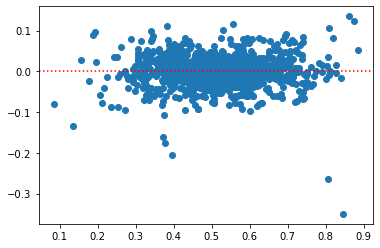

In [591]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

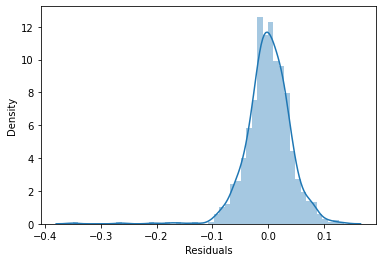

In [600]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

plt.xlabel("Residuals")
plt.show()

##  Lasso Regression

In [576]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [577]:
# Printing the best hyperparameter alpha and best score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.03444891044414502


In [578]:
#Fitting Lasso model for alpha =0.0001  and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [579]:
lasso.coef_

array([-0.02347102,  0.        ,  0.0854151 ,  0.21738144,  0.08152909,
        0.02441455,  0.        ,  0.        ,  0.        ,  0.02450909,
       -0.00359198,  0.03129698,  0.02001661,  0.12307578,  0.00388807,
        0.02408742,  0.0543042 ,  0.01649438,  0.        ,  0.05387509,
        0.09815003,  0.04885844,  0.10661293,  0.03297019,  0.        ,
        0.03835038,  0.018683  ,  0.03115335,  0.        ,  0.00664439,
        0.01156334, -0.00213958, -0.00731328,  0.03148403,  0.04579015,
        0.04695985,  0.03677982, -0.        ,  0.00491988,  0.0069782 ,
       -0.01892127, -0.00088535,  0.01014769,  0.02419788,  0.01398582,
        0.01292719, -0.01754211, -0.        , -0.00157651,  0.00334378,
       -0.        , -0.        , -0.018003  ,  0.        ,  0.03060569,
       -0.00462729,  0.05094629, -0.02377294, -0.01602069, -0.03565246,
       -0.02512395,  0.        , -0.        , -0.        , -0.00025482,
        0.04977547,  0.0439427 , -0.00797208,  0.        , -0.00

In [583]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score train : ' , r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score test : ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score train :', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score test :', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE score test : ', mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score train :  0.8973256945053205
R2 score test :  0.8640714644311416
RSS score train : 1.743064094663468
RSS score test : 1.0406347627505663
MSE score train :  0.0017072126294451204
MSE score test :  0.002370466429955732


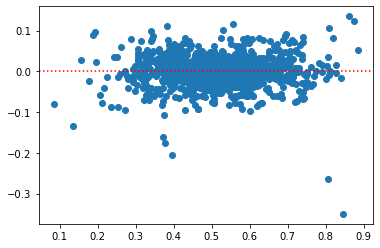

In [599]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

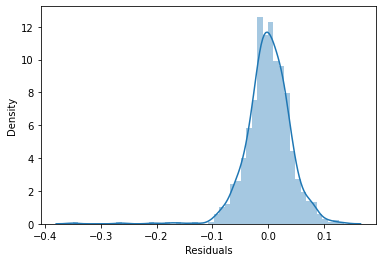

In [598]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

plt.xlabel("Residuals")
plt.show()

In [586]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.062893e-01,0.900161,0.897326
1,R2 Score (Test),-3.123429e+22,0.862928,0.864071
2,RSS (Train),1.590892e+00,1.694925,1.743064
3,RSS (Test),2.391219e+23,1.049388,1.040635
4,MSE (Train),3.947367e-02,0.040744,0.041318
5,MSE (Test),2.333874e+10,0.048892,0.048687


# Comparision of coefficients after regularization

In [602]:
betas = pd.DataFrame(index=X_train.columns)

In [603]:
betas.rows = X_train.columns

In [604]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [605]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-0.049399,-0.031151,-0.023471
LotFrontage,-0.007103,0.016377,0.000000
LotArea,0.172453,0.065389,0.085415
OverallQual,0.192505,0.169224,0.217381
OverallCond,0.085398,0.076130,0.081529
YearRemodAdd,0.021545,0.024951,0.024415
MasVnrArea,0.000334,0.011047,0.000000
ExterQual,-0.013114,0.003337,0.000000
ExterCond,0.007032,0.005108,0.000000
BsmtQual,0.030547,0.035725,0.024509


In [606]:
# top 10 features in Ridge
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual     0.169224
FullBath        0.091936
BedroomAbvGr    0.089012
BsmtFinSF1      0.084504
OverallCond     0.076130
LotArea         0.065389
BsmtFullBath    0.055398
RL              0.055227
BsmtUnfSF       0.053454
RH              0.051430
Name: Ridge, dtype: float64

In [607]:
# top 10 features in Lasso
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual     0.217381
BsmtFinSF1      0.123076
BedroomAbvGr    0.106613
FullBath        0.098150
LotArea         0.085415
OverallCond     0.081529
BsmtUnfSF       0.054304
BsmtFullBath    0.053875
Crawfor         0.050946
NoRidge         0.049775
Name: Lasso, dtype: float64

# Conclusion

##### Linear Regression 
      R2 Score (Train) = 9.062893e-01
      R2 Score (Test)  = -3.123429e+22
      RSS (Train)	   = 1.590892e+00
      RSS (Test)	   = 2.391219e+23
      MSE (Train)	   = 3.947367e-02
      MSE (Test)	   = 2.333874e+10      
##### Ridge Regression 
      R2 Score (Train) = 0.900161
      R2 Score (Test)  = 0.862928
      RSS (Train)	   = 1.694925
      RSS (Test)	   = 1.049388
      MSE (Train)	   = 0.040744
      MSE (Test)	   = 0.048892     
##### Lasso Regression 
      R2 Score (Train) = 0.897326
      R2 Score (Test)  = 0.864071
      RSS (Train)	   = 1.743064
      RSS (Test)	   = 1.040635
      MSE (Train)	   = 0.041318
      MSE (Test)	   = 0.048687

##### Lambda values
      Ridge =  2.0
      Lasso =  0.0001

#####  Features that play important role in predicting the sale price for the house are,

###### 1. Regde regression 
        OverallQual   
        FullBath        
        BedroomAbvGr    
        BsmtFinSF1      
        OverallCond     
        LotArea         
        BsmtFullBath    
        RL - [MSZoning]          
        BsmtUnfSF       
        RH - [MSZoning]             
         

###### 2. Lasso regression 
        OverallQual     
        BsmtFinSF1      
        BedroomAbvGr    
        FullBath        
        LotArea         
        OverallCond     
        BsmtUnfSF       
        BsmtFullBath    
        Crawfor  - [Neighborhood]       
        NoRidge  - [Neighborhood]           

R2 Score of Test data for Lasso regression is 0.864071 is slightly higher than the R2 Score of Test data for Redge regression , which is 0.862928.

Mean square error of Test data for Lasso regression is 0.048687 is slightly lower than the Mean square error of Test data for Redge regression , which is 0.048892.

###### Lasso regression model can predict the more accurate values for the sale price for house.


# Assignment Part-II 

###### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

###### Answer 1

Optimal value of alpha for ridge regression = 2.0                                  
Optimal value of alpha for lasso regression = 0.0001

 Double the value of alpha for ridge = 4.0                 
 Double the value of alpha for lasso = 0.0002

In [609]:
# Redge regression with alpha 4.0
alpha_1 = 4.0
ridge_1 = Ridge(alpha=alpha_1)

ridge_1.fit(X_train, y_train)
print(ridge_1.coef_)

[-0.028281    0.01883439  0.04416815  0.14708996  0.06650884  0.02762413
  0.01408436  0.01291827  0.00541291  0.03532367 -0.00694124  0.03302025
  0.02551945  0.05869161  0.0051548   0.01910453  0.04556632  0.01753269
  0.00226842  0.05124268  0.08835916  0.04215612  0.07569771  0.0388511
  0.01645348  0.03511927  0.02106164  0.03333537  0.00781773  0.01419142
  0.01316421 -0.00359396 -0.00878632  0.02373828  0.03399216  0.03970613
  0.03054945 -0.00157641  0.01132996  0.00876156 -0.01429451 -0.00100479
  0.01451     0.02666557  0.01553373  0.01574633 -0.01762017 -0.00950512
 -0.0015997   0.00656188 -0.00250029 -0.00283931 -0.02099148 -0.00399156
  0.02178954 -0.01047467  0.0444377  -0.02881173 -0.02591311 -0.04260882
 -0.03627228 -0.00698437 -0.00415652 -0.00456214 -0.00511538  0.0468596
  0.04056605 -0.01535435  0.00462829 -0.01389413 -0.00051979  0.02514822
  0.03903208  0.00079073  0.02422758  0.00265889  0.01526854  0.01391798
 -0.0008009  -0.01121517  0.01601986 -0.00236422  0.0

In [610]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge_1.predict(X_train)
y_pred_test = ridge_1.predict(X_test)

metric1_1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score train : ' , r2_train_lr)
metric1_1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score test : ', r2_test_lr)
metric1_1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score train :', rss1_lr)
metric1_1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score test :', rss2_lr)
metric1_1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_lr)
metric1_1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE score test : ', mse_test_lr)
metric1_1.append(mse_test_lr**0.5)

R2 score train :  0.894541961222369
R2 score test :  0.8602941483537443
RSS score train : 1.7903225154655833
RSS score test : 1.0695529468800853
MSE score train :  0.0017534990357155565
MSE score test :  0.002436339286742791


In [611]:
# Lasso regression with alpha 0.0002
alpha_2 =0.0002

lasso_1 = Lasso(alpha=alpha_2)
        
lasso_1.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [612]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_1.predict(X_train)
y_pred_test = lasso_1.predict(X_test)

metric2_1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score train : ' , r2_train_lr)
metric2_1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score test : ', r2_test_lr)
metric2_1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score train :', rss1_lr)
metric2_1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score test :', rss2_lr)
metric2_1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_lr)
metric2_1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE score test : ', mse_test_lr)
metric2_1.append(mse_test_lr**0.5)

R2 score train :  0.8866375591632907
R2 score test :  0.8588896759609219
RSS score train : 1.9245126553704224
RSS score test : 1.080305235126096
MSE score train :  0.0018849291433598652
MSE score test :  0.0024608319706744784


In [613]:
betas_1 = pd.DataFrame(index=X_train.columns)
betas_1.rows = X_train.columns
betas_1['Ridge'] = ridge_1.coef_
betas_1['Lasso'] = lasso_1.coef_

In [614]:
# top 10 features in Ridge
betas_1['Ridge'].sort_values(ascending=False)[:10]

OverallQual     0.147090
FullBath        0.088359
BedroomAbvGr    0.075698
OverallCond     0.066509
BsmtFinSF1      0.058692
BsmtFullBath    0.051243
NoRidge         0.046860
BsmtUnfSF       0.045566
Crawfor         0.044438
LotArea         0.044168
Name: Ridge, dtype: float64

In [615]:
betas_1['Lasso'].sort_values(ascending=False)[:10]

OverallQual     0.232108
FullBath        0.104241
BedroomAbvGr    0.102598
OverallCond     0.071314
BsmtFullBath    0.057712
BsmtFinSF1      0.057584
HalfBath        0.048455
NoRidge         0.047917
Crawfor         0.045870
NridgHt         0.039949
Name: Lasso, dtype: float64

###### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

###### Answer 3

Dropping the 5 most important predictor variables in the lasso model.

 5 most important predictor variables for lasso are ,                           
 OverallQual, BsmtFinSF1, BedroomAbvGr, FullBath and LotArea 

In [616]:
drop_col = ['OverallQual', 'BsmtFinSF1', 'BedroomAbvGr', 'FullBath' , 'LotArea']


In [617]:
# Dropping the 5 most imp predictor variables form train and test data and storing it in new data frames.
X_train_1 = X_train.drop(drop_col, axis=1)
X_test_1 = X_test.drop(drop_col, axis=1)

In [620]:
lasso_1 = Lasso()

# cross validation
model_cv_1 = GridSearchCV(estimator = lasso_1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_1.fit(X_train_1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [621]:
# Printing the best hyperparameter alpha and best score
print(model_cv_1.best_params_)
print(model_cv_1.best_score_)

{'alpha': 0.0001}
-0.04099124404441514


In [622]:
#Fitting Lasso model for alpha =0.0001  and printing coefficients which have been penalised

alpha_3 =0.0001

lasso_2 = Lasso(alpha=alpha_3)
        
lasso_2.fit(X_train_1, y_train) 

Lasso(alpha=0.0001)

In [623]:
lasso_2.coef_

array([-1.05419032e-02,  4.15614547e-02,  9.26443534e-02,  3.06925626e-02,
        2.75719975e-02,  3.08115614e-02,  4.22751357e-03,  6.98339664e-02,
       -1.37564000e-02,  3.63433883e-02,  3.20825392e-02, -0.00000000e+00,
        2.83152095e-02,  7.31040190e-02,  1.51777764e-02,  0.00000000e+00,
        5.74933643e-02,  2.32474724e-02,  5.72471433e-02,  3.39690142e-02,
        3.78648697e-02,  3.85309074e-02,  3.62605022e-02,  1.57593175e-02,
        1.01855355e-02,  7.38800342e-03, -0.00000000e+00, -1.03313766e-02,
        5.78174228e-02,  7.08589714e-02,  6.88752459e-02,  5.92015238e-02,
       -0.00000000e+00,  2.06799487e-02,  5.79143846e-03, -0.00000000e+00,
        6.60747013e-05,  4.37696132e-03,  1.72128591e-02,  7.84774769e-03,
        1.62823999e-02, -1.02491514e-02, -0.00000000e+00,  1.41762828e-03,
        7.26340394e-03, -0.00000000e+00,  0.00000000e+00, -1.07799863e-02,
       -1.45914485e-02,  1.20287541e-02, -5.36804075e-03,  4.71327227e-02,
       -3.63962517e-02, -

In [625]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_2.predict(X_train_1)
y_pred_test = lasso_2.predict(X_test_1)

metric2_2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score train : ' , r2_train_lr)
metric2_2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score test : ', r2_test_lr)
metric2_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score train :', rss1_lr)
metric2_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score test :', rss2_lr)
metric2_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_lr)
metric2_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE score test : ', mse_test_lr)
metric2_2.append(mse_test_lr**0.5)

R2 score train :  0.8627327742188503
R2 score test :  0.8183562009045501
RSS score train : 2.3303354376775793
RSS score test : 1.3906193499822495
MSE score train :  0.0022824049340622716
MSE score test :  0.0031676978359504544


In [626]:
betas_2 = pd.DataFrame(index=X_train_1.columns)
betas_2.rows = X_train_1.columns
betas_2['Lasso'] = lasso_2.coef_

In [628]:
pd.set_option('display.max_rows', None)
betas_2.head(68)

,Lasso
MSSubClass,-0.010542
LotFrontage,0.041561
OverallCond,0.092644
YearRemodAdd,0.030693
MasVnrArea,0.027572
ExterQual,0.030812
ExterCond,0.004228
BsmtQual,0.069834
BsmtCond,-0.013756
BsmtExposure,0.036343


In [629]:
# top 5 features in Lasso
betas_2['Lasso'].sort_values(ascending=False)[:5]

OverallCond    0.092644
BsmtUnfSF      0.073104
NoRidge        0.071097
RH             0.070859
BsmtQual       0.069834
Name: Lasso, dtype: float64

5 most important predictor variables now are, 
###### OverallCond, BsmtUnfSF, NoRidge  - [Neighborhood], RH - [MSZoning] and BsmtQual        